# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import gaussian_kde

## Read in Data
flight = pd.read_csv("flight.csv")
print("Dimensions of flight df: ", flight.shape) # (129780, 12)
print(flight.head())
print(flight.info()) # no missing values. Most variables are categorical, except miles (int), passengers (int), delay (int) coach_price (float), firstclass_price (float), and hours (int).
print(flight.describe()) # the range and scale of quantitative variables vary (1 to 3 order of magnitude).

Dimensions of flight df:  (129780, 12)
   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.fra

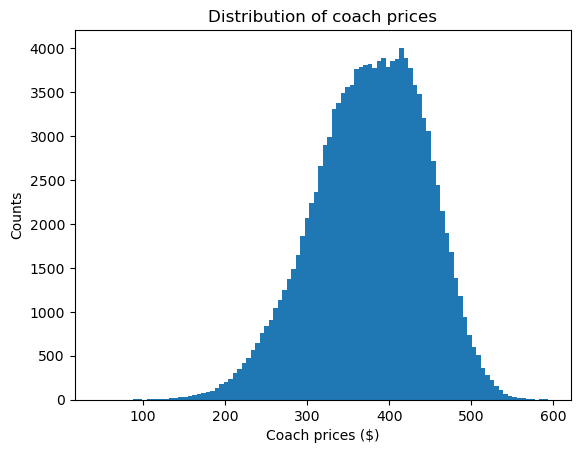

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

In [33]:
## Task 1: 
# What do coach ticket prices look like? A histogram should help as it's a quantitative variable.
plt.hist(flight.coach_price, bins=100) # normal distribution centered around $400, and ranging from $100-$600.
plt.xlabel('Coach prices ($)')
plt.ylabel('Counts')
plt.title('Distribution of coach prices')
plt.show() # Show the plot
plt.clf() # Clear the plot
# What are the high and low values? # What would be considered the average? Summary stats will tell us.
print(flight.coach_price.describe()) # average = $376, min = $44, Q3 = $427, max = $594
# Does $500 seem like a good price for a coach ticket? based on hitogram and summary stats, it would be an expensive ticket.

Coach ticket prices follow a normal distribution centered around 400 dollars, and range from 100-600. A 500 coach ticket is very expensive.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Dimensions of flight_8h df:  (2634, 12)


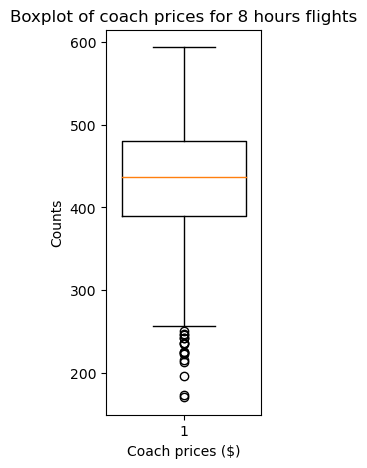

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

In [7]:
## Task 2
# visualize the coach ticket prices for flights that are 8 hours long. A box plot would help.
flight_8h = flight[flight.hours == 8]
print("Dimensions of flight_8h df: ", flight_8h.shape) # (2634, 12)
#print(flight_8h.head())
plt.figure(figsize=(2,5))
plt.boxplot(flight_8h.coach_price, widths=0.8)
plt.xlabel('Coach prices ($)')
plt.ylabel('Counts')
plt.title('Boxplot of coach prices for 8 hours flights')
plt.show() # Show the plot
plt.clf() # Clear the plot
# What are the high, low, and average prices for 8-hour-long flights? Summary stats will tell us.
print(flight_8h.coach_price.describe()) # average = $432, min = $170, Q3 = $480, max = $594
# Does a $500 dollar ticket seem more reasonable than before? yes, but it still more expensive than most tickets

 The cost of 8-hour-long flights ranges from 432-594 dollars, with and average of 432 and median of 380. A 500 dollar ticket for an 8-h flight is more reasonable but still more expensive than most tickets.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


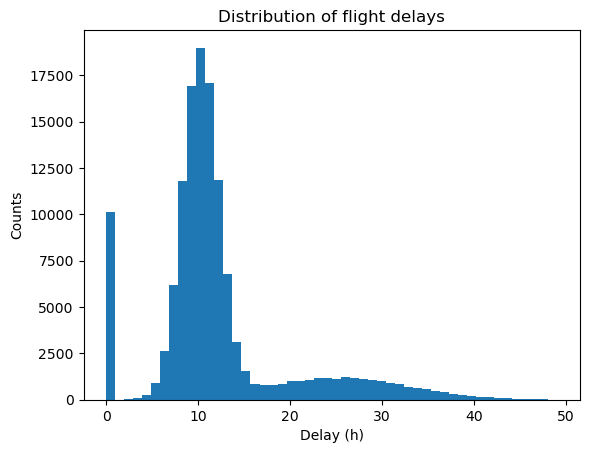

<Figure size 640x480 with 0 Axes>

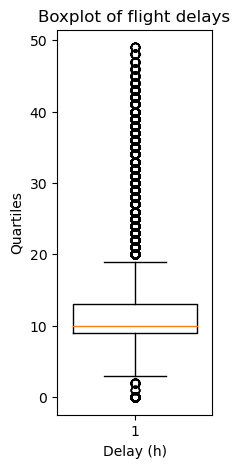

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 3
# How are flight delay times distributed? A histogram should help as it's a quantitative variable.
# plt.hist(flight.delay, bins=100) # very skewed towards few hours (which is good for the travelers!). Not the best represntation though due to outliers.
# plt.xlabel('Delay (h)')
# plt.ylabel('Counts')
# plt.title('Distribution of flight delays')
# plt.show() # Show the plot
# plt.clf() # Clear the plot
# Descriptive stats
print(flight.delay.describe()) # mean = 13h, Q1 = 9h, Q3 = 13h, max = 1560h
# let's try subsetting the data.
plt.hist(flight.delay[flight.delay < 50], bins=50) # trimodal data with most delays being 8-12h, second less than 1h, and third about 1 day.
plt.xlabel('Delay (h)')
plt.ylabel('Counts')
plt.title('Distribution of flight delays')
plt.show() # Show the plot
plt.clf() # Clear the plot
# Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. 
# You want to better understand how often there are large delays so you can correctly set up connecting flights. 
# What kinds of delays are typical? a boxplot would help
plt.figure(figsize=(2,5))
plt.boxplot(flight.delay[flight.delay < 50], widths=0.8) # 10h delays are typical
plt.xlabel('Delay (h)')
plt.ylabel('Quartiles')
plt.title('Boxplot of flight delays')
plt.show() # Show the plot
plt.clf() # Clear the plot

Most flight delay times are less than 15 hours, with a large proportion being < 1 hour. Connecting flights starting 10 hours after would statisfy 50% of customers affected by delay. Though very rare, delays can be up to 48h.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Intercept             769.146468
flight.coach_price      1.821063
dtype: float64


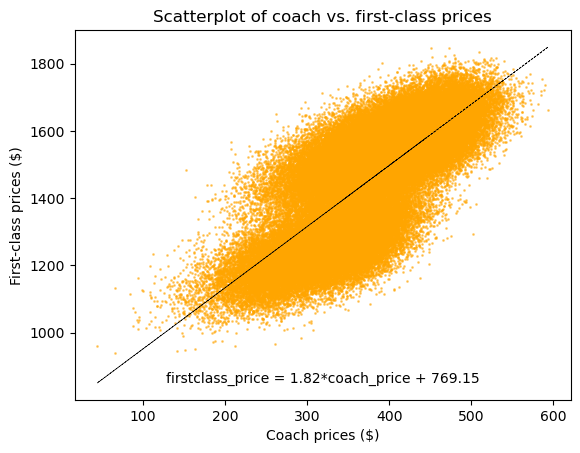

<Figure size 640x480 with 0 Axes>

In [11]:
## Task 4
# Create a visualization that shows the relationship between coach and first-class prices. Both are quantitative viariables, so a scatterplot is suitable.
# plt.scatter(flight.coach_price, flight.firstclass_price, s=1, alpha=0.5)
# plt.xlabel('Coach prices ($)')
# plt.ylabel('First-class prices ($)')
# plt.title('Scatterplot of coach vs. first-class prices')
# plt.show() # Show the plot
# plt.clf() # Clear the plot
# What is the relationship between these two prices? 
# there is a strong positive linear relationship between both variables, meaning one determines the other. 
# We could compute the linear regression to summarise it and predict prices.
import statsmodels.api as sm
model = sm.OLS.from_formula('flight.firstclass_price ~ flight.coach_price', data = flight)
results = model.fit()
print(results.params)
LM = 'firstclass_price = 1.82*coach_price + 769.15'
plt.scatter(flight.coach_price, flight.firstclass_price, s=1, alpha=0.5, color='orange')
plt.plot(flight.coach_price, results.params[0] + results.params[1]*flight.coach_price, color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('Coach prices ($)')
plt.ylabel('First-class prices ($)')
plt.title('Scatterplot of coach vs. first-class prices')
plt.legend(title=LM, fontsize='x-small', mode='expand', framealpha=0, edgecolor='white')
plt.show() # Show the plot
plt.clf() # Clear the plot
# Do flights with higher coach prices always have higher first-class prices as well? yes

The relationship between coach and first class prices is linear, meaning for flights in which coach tickets are expensive, so are first class tickets.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

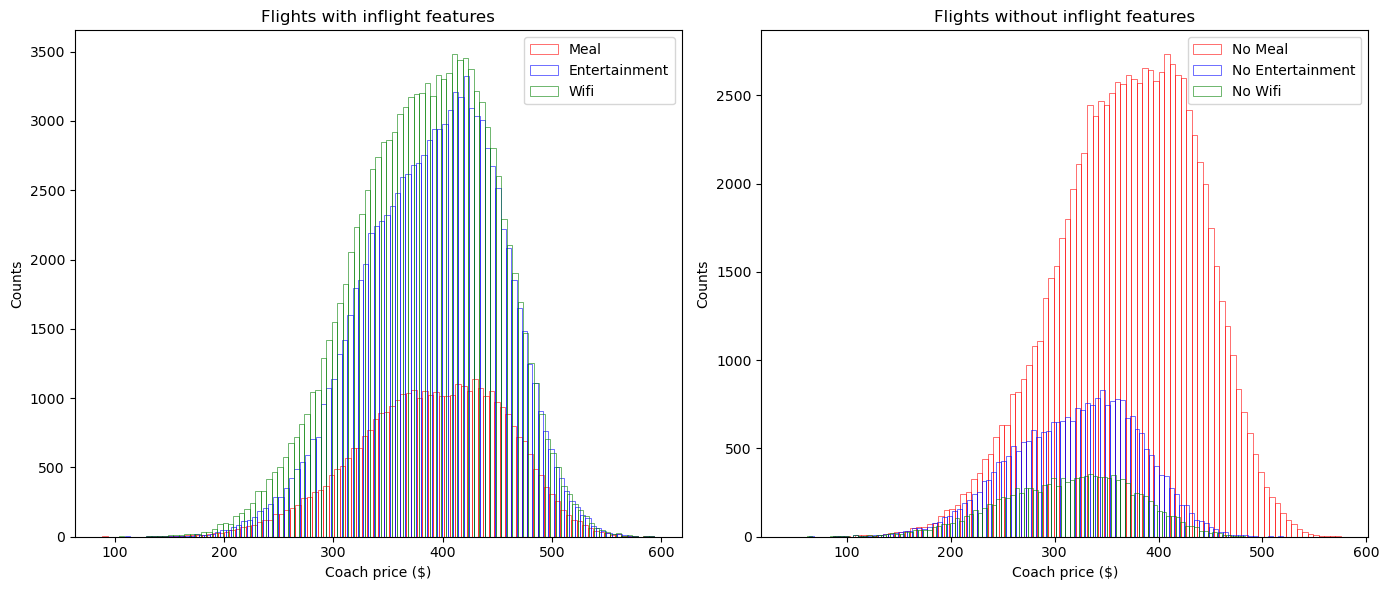

<Figure size 640x480 with 0 Axes>

In [13]:
## Task 5
# What is the relationship between coach prices and inflight features: inflight meal, inflight entertainment, and inflight WiFi? 
# A bivariate visualisation can help. All those variables are binary (yes, no)
# let's try overlaid histograms first
plt.figure(figsize=(14, 6))
# Flights with inflight features
plt.subplot(1, 2, 1)
sns.histplot(data=flight[flight.inflight_meal == 'Yes'], x='coach_price', color='r', alpha=0.8, bins=100, label='Meal', fill=False)
sns.histplot(data=flight[flight.inflight_entertainment == 'Yes'], x='coach_price', color='b', alpha=0.8, bins=100, label='Entertainment', fill=False)
sns.histplot(data=flight[flight.inflight_wifi == 'Yes'], x='coach_price', color='g', alpha=0.8, bins=100, label='Wifi', fill=False)
plt.title('Flights with inflight features')
plt.xlabel('Coach price ($)')
plt.ylabel('Counts')
plt.legend()
# Flights without inflight features
plt.subplot(1, 2, 2)
sns.histplot(data=flight[flight.inflight_meal == 'No'], x='coach_price', color='r', alpha=0.8, bins=100, label='No Meal', fill=False)
sns.histplot(data=flight[flight.inflight_entertainment == 'No'], x='coach_price', color='b', alpha=0.8, bins=100, label='No Entertainment', fill=False)
sns.histplot(data=flight[flight.inflight_wifi == 'No'], x='coach_price', color='g', alpha=0.8, bins=100, label='No Wifi', fill=False)
plt.title('Flights without inflight features')
plt.xlabel('Coach price ($)')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()  # Clear the current figure
# Which features are associated with the highest increase in price? wifi, then entertainment

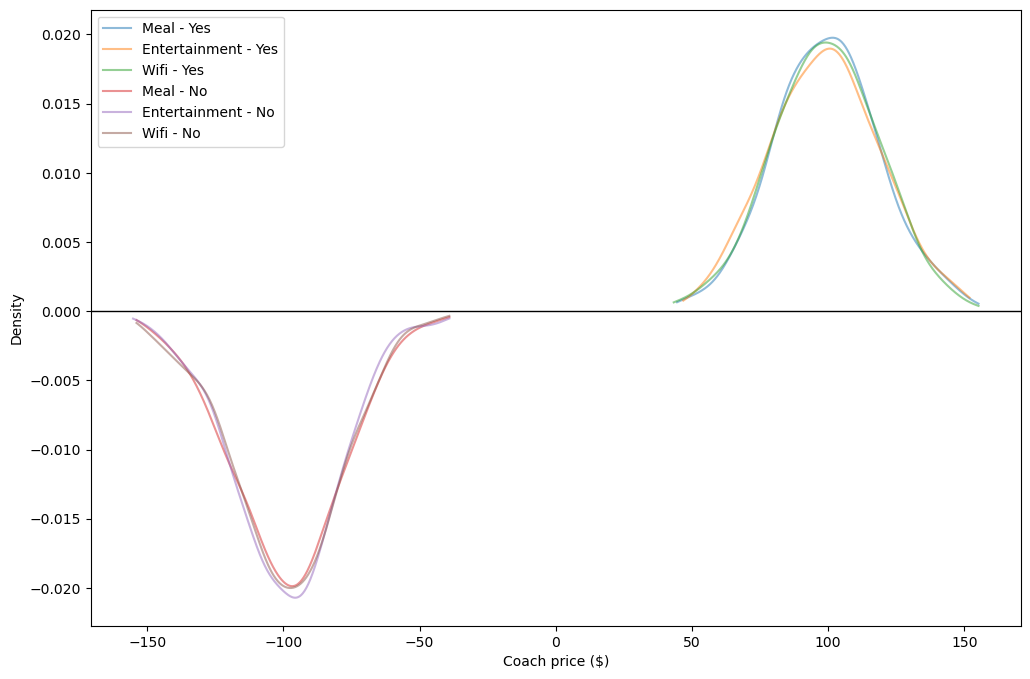

In [242]:
# subsample the data
np.random.seed(0)
flight = pd.DataFrame({
    'coach_price': np.random.normal(loc=100, scale=20, size=1000),
    'inflight_meal': np.random.choice(['Yes', 'No'], size=1000),
    'inflight_entertainment': np.random.choice(['Yes', 'No'], size=1000),
    'inflight_wifi': np.random.choice(['Yes', 'No'], size=1000)
})

# Create a figure
plt.figure(figsize=(12, 8))
# Plot density chart for flights with inflight features
for feature in ['Meal', 'Entertainment', 'Wifi']:
    data_yes = flight[flight[f'inflight_{feature.lower()}'] == 'Yes']['coach_price']
    kde = gaussian_kde(data_yes)
    x_range = np.linspace(min(data_yes), max(data_yes), len(data_yes))
    plt.plot(x_range, kde(x_range), label=f'{feature} - Yes', alpha=0.5)

# Plot density chart for flights without inflight features (mirrored)
for feature in ['Meal', 'Entertainment', 'Wifi']:
    data_no = flight[flight[f'inflight_{feature.lower()}'] == 'No']['coach_price']
    kde = gaussian_kde(data_no)
    x_range = np.linspace(min(data_no), max(data_no), len(data_no))
    plt.plot(x_range * -1, kde(x_range) * -1, label=f'{feature} - No', alpha=0.5)

# Add axis labels and a horizontal line at y=0
plt.xlabel('Coach price ($)')
plt.ylabel('Density')
plt.axhline(y=0, linestyle='-', linewidth=1, color='black')
# Show legend
plt.legend()
# Show the plot
plt.show()

Wifi then entertainment are the features associated with the highest increase in price. The density mirror plot further shows that optional features (meal, enterntainment, and wifi) drive coach prices upward. 

6. How does the number of passengers change in relation to the length of flights?

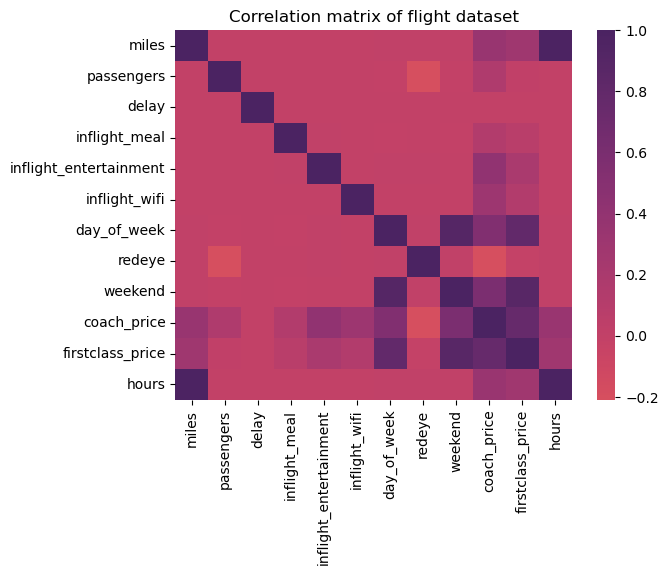

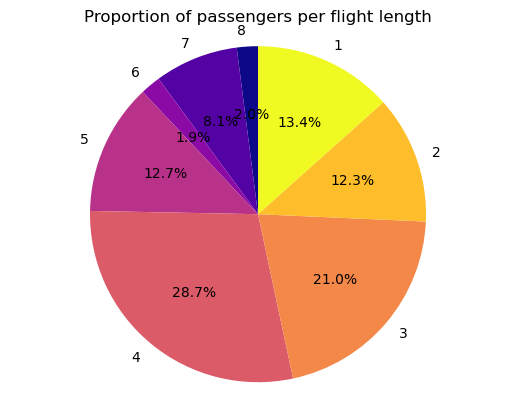

<Figure size 640x480 with 0 Axes>

In [36]:
## Task 6
# How does the number of passengers change in relation to the length of flights? a correlation analysis can answer this
# Convert binary yes/no to 0/1 and categorical days to 1-7 for correlation
flight1 = flight.copy()
flight1.inflight_meal = flight1.inflight_meal.replace({'No': 0, 'Yes': 1}).astype(int)
flight1.inflight_entertainment = flight1.inflight_entertainment.replace({'No': 0, 'Yes': 1}).astype(int)
flight1.inflight_wifi = flight1.inflight_wifi.replace({'No': 0, 'Yes': 1}).astype(int)
flight1.redeye = flight1.redeye.replace({'No': 0, 'Yes': 1}).astype(int)
flight1.weekend = flight1.weekend.replace({'No': 0, 'Yes': 1}).astype(int)
flight1.day_of_week = flight1.day_of_week.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':6}).astype(int)
#print(flight1.head())
#print(flight.head())
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.color_palette("flare", as_cmap=True)
# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(flight1.corr(), center=0, cmap=colors, robust=True) # Passengers and hours are strongly positively correlated
plt.title('Correlation matrix of flight dataset')
plt.show()
plt.clf()
# calculate proportions of passengers per hours
flight_h_prop = flight.groupby(['hours']).sum().sort_index(ascending=False)
#print(flight_h_prop)
# plot data
wedge_sizes = flight_h_prop.passengers
pie_labels = flight_h_prop.index
# Generate a color gradient
import matplotlib.cm as cm
num_wedges = len(wedge_sizes)
colors = cm.plasma(np.linspace(0, 1, num_wedges))  # other possible color map (e.g., 'viridis', 'plasma', 'inferno', etc.)
plt.pie(wedge_sizes, labels=pie_labels, autopct='%0.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Proportion of passengers per flight length')
plt.show() # Show the plot
plt.clf() # Clear the plot

Most passengers travel by air for 3-4 hours, much less so for flights longer than 5 hours.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

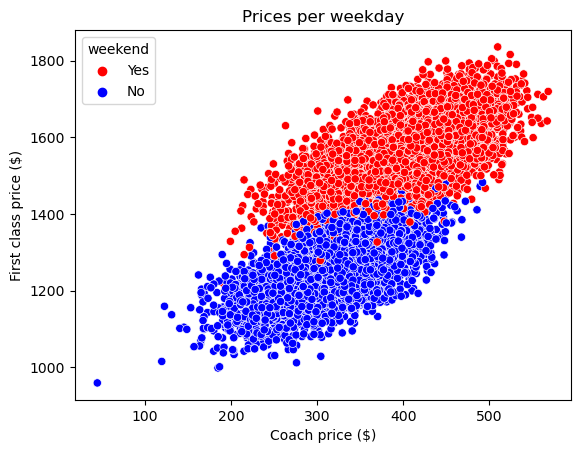

weekend
No     320.586344
Yes    406.101621
Name: coach_price, dtype: float64


<Figure size 640x480 with 0 Axes>

In [11]:
## Task 7
# Visualize the relationship between coach and first-class prices on weekends compared to weekdays. Prices are quantitative variables, so a scatterplot is suitable.
# that's a lot of data, so I'll subset randomly 10%
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.scatterplot(x=flight_sub.coach_price, y=flight_sub.firstclass_price, hue=flight_sub.weekend, palette=['red','blue']) # weekend prices are much more expensive
plt.xlabel('Coach price ($)')
plt.ylabel('First class price ($)')
plt.title('Prices per weekday')
plt.show() # Show the plot
plt.clf() # Clear the plot
#print(flight.head())
# compute means of both
print(flight_sub.coach_price.groupby(flight_sub.weekend).mean())
# Average flight price for a weekday: $320
# Average flight price for a weekend: $406

Flight prices are greater on weekend for both coach and first class, in a linear fashion (i.e. proportionally).

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

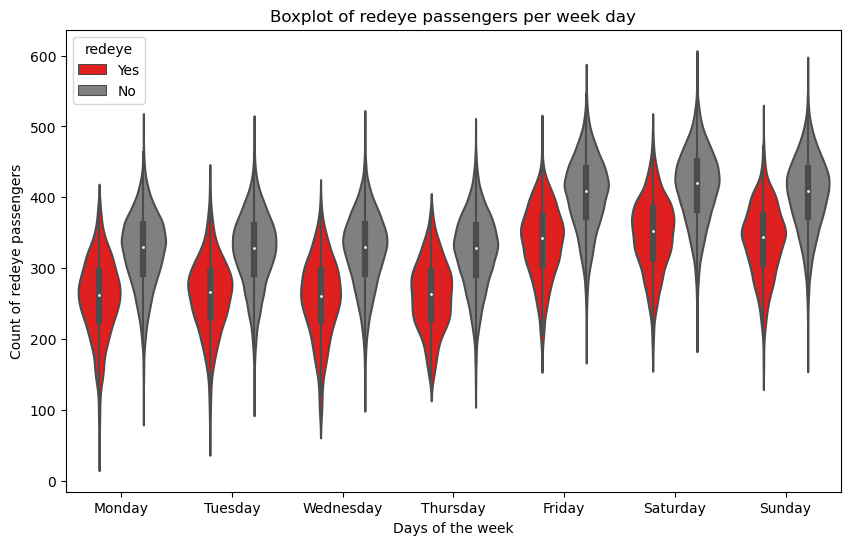

<Figure size 640x480 with 0 Axes>

In [44]:
## Task 8
# How do coach prices differ for redeyes and non-redeyes on each day of the week? redeye is a binary variable. Boxplots or violin plots should suit.
plt.figure(figsize=(10,6))
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.violinplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight, palette =['red','grey'], order=weekdays) # redeye prices are systematically lower
plt.xlabel('Days of the week')
plt.ylabel('Count of redeye passengers')
plt.title('Boxplot of redeye passengers per week day')
plt.show() # Show the plot
plt.clf() # Clear the plot

Redeye flights are not as popular as non redeye flights, numbering consistently less every day of the week.